In [10]:
# Manipulação de dados
import pandas as pd
import numpy as np
import math
# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning 
from sklearn import metrics # analisa a acurácia de nossos modelos
# Ocultando Warnings indesejados

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer #importando a base de dados nativas no sklearn


### Funções auxiliares


Reta = Hipotese = $$ w_0 + w_1*X $$

###Sigmoide
Sigmoide = $$ \frac{1}{1+e^{-x}} $$


In [11]:
def sigmoide(x):
  return 1/(1+math.exp(-x))

### Regressão Linear

###Erro Medio Quadrático  MSE

MSE(Erro Médio Quadrático) = $$ \frac{1}{m}∑_{i=0}^m (y'_i - y_i)^2 $$

sendo y' = $ w_0 + w_1*X $


###Gradiente descendente 1 variavel


Repita n vezes{
  $$ w_0 := w_0 - αΔ_{w_0} $$
  $$ w_1 := w_1 - αΔ_{w_1} $$
}

###Gradiente Descendente

Sendo $ α $, taxa de aprendizado \\
Sendo $Δ_{w_i} $, gradiente(derivada)

$$ Δ_{w_0} = \frac{δJ}{δw_0} J(w_0, w_1) $$

$$ Δ_{w_1} = \frac{δJ}{δw_0} J(w_0, w_1) $$

Sendo MSE = $ J(w_0, w_1) $


para $Δ_{w_0}$
\
$$ Δ_{w_0} = \frac{dJ}{dw_0} \frac{1}{2m} ∑_{i=0}^m (y' - y)^2 $$
\
\
$$ Δ_{w_0} = \frac{dJ}{dw_1} \frac{1}{2m} ∑_{i=0}^m ( (w_0 + w_1*X_i) - y)^2 $$
\
\
$$ Δ_{w_0} = \frac{1}{2m} ∑_{i=0}^m \frac{dJ}{dw_0}( (w_0 + w_1*X_i) - y)^2 $$
\
\
$$ Δ_{w_0} = \frac{1}{m} ∑_{i=0}^m ( (w_0 + w_1X) - y)$$
\
\
$$ Δ_{w_0} = \frac{1}{m} ∑_{i=0}^m ( y' - y)$$
\
\
\
\
para $Δ_{w_1}$
\
$$ Δ_{w_1} = \frac{dJ}{dw_1} \frac{1}{2m} ∑_{i=0}^m (y' - y)^2 $$
\
\
$$ Δ_{w_1} = \frac{dJ}{dw_1} \frac{1}{2m} ∑_{i=0}^m ( (w_0 + w_1*X_i) - y)^2 $$
\
\
$$ Δ_{w_1} = \frac{1}{2m} ∑_{i=0}^m \frac{dJ}{dw_1}( (w_0 + w_1*X_i) - y)^2 $$
\
\
$$ Δ_{w_1} = \frac{1}{2m} ∑_{i=0}^m 2( (w_0 + w_1*X_i) - y) (X_i) $$
\
\
$$ Δ_{w_1} = \frac{1}{m} ∑_{i=0}^m (y' - y) (X_i) $$

###Gradiente Descendente Atualizado
Repetir n vezes{
  $$w_0 := w_0 - α \frac{1}{m} ∑_{i=0}^m (y'_i-y_i) $$
\
  $$w_1 := w_1 - α \frac{1}{m} ∑_{i=0}^m x_i(y'_i - y_i) $$

}


###Custo:

$$ \frac{1}{m} ∑_{i=0}^m ( y'_i - y_i)$$


###Algoritmo

#### Hyperparametros:
lr = Learning Rate = $α$ \
epochs = Numero de iterações = $n$ \

#### Entradas
x = features \
y = ground truth \
\
inicia-se os pesos $w_0, w_1$, exemplo \
$$w_0 = 0.1 $$ \
$$w_1 = 0.1 $$\
\
e seta os hiperparametros, exemplo \
$$lr = 0.1  $$ \\
$$epochs = 10 $$

para cada iteração até o numero de epocas: 
  calcular os erros w0, w1 e o custo: \

  $$ y' = w_0 + w_1*X $$ \\

  $$ erro_{w0} =  \frac{1}{m} ∑_{i=0}^m ( y'_i - y_i) $$ \\

   $$ erro_{w1} =  \frac{1}{m} ∑_{i=0}^m x_i( y'_i - y_i) $$ \\

   $$ custo = \frac{1}{m} ∑_{i=0}^m ( y'_i - y_i)$$

calcule os novos pesos: \

$$ w_0 = w_0 - erro_{w0} $$ \\
$$ w_1 = w_1 - erro_{w1} $$

retorna $w_0,\ w_1$, custo



In [12]:
## Função de custo

#Mean Square Error - Erro Médio Quadrático
def MSE(predict, ground_truth):
  m = predict.size
  erro = sum((predict-ground_truth)**2)
  return erro/(2*m)

def cost(x, y, w0, w1):
  predict = np.asarray([y_hat(x[i], w0, w1) for i in range(len(x))])
  return 2*MSE(predict, y)


## valores preditos
def y_hat(x, w0, w1):
  return w0 + w1*x


## plotar linha
def plot_line(x, y, w0, w1):
  x_values = [i for i in range(int(min(x))-1, int(max(x))+2)]
  y_values = [y_hat(x, w0, w1) for x in x_values]
  plt.plot(x_values, y_values)
  plt.plot(x, y, 'bo')


##passo do gradiente descendente
##x = vetor de features
##y = ground_truth

class LinearRegression:

  def __init__(self, lr, epochs):
    self.lr = lr
    self.epochs = epochs
    self.w0 = 0.1
    self.w1 = 0.1

  def initWeight(self):
    self.w0 = 0.1
    self.w1 = 0.1

  def gradientDescStep(self, x, y):
    erro_w0 = 0
    erro_w1 = 0
    m = len(x)

    for i in range(m):
      erro_w0 += y_hat(y[i], self.w0, self.w1)-y[i]
      erro_w1 += y_hat(y[i], self.w0, self.w1)-y[i]*x[i]
      
    w0_n = self.w0-(lr/m)*erro_w0
    w1_n = self.w1-(lr/m)*erro_w1
    return w0_n, w1_n

  ##algoritmo de gradiente descendente
  def gradientDesc(self, x, y):
    custo = []
    for i in range(epochs):
      self.w0, self.w1 = self.gradientDescStep(x, y)
      custo.append(cost(x, y, self.w0, self.w1))
      #print("epoch: ", i)
      #print("custo: ", custo[i])
    return self.w0, self.w1, custo

  def run(self, x, y):
    return self.gradientDesc(x, y)


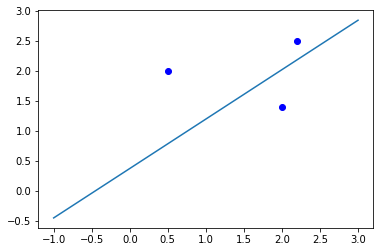

In [13]:
### Teste funções

lr = 0.01
epochs = 40

x = [0.5, 2.2, 2.0]
y = [2.0, 2.5, 1.4]

rl = LinearRegression(lr, epochs)

w0, w1, custo = rl.run(x, y)

plot_line(x, y, w0, w1 )

### Multiplas Variaveis

$$ y' = w_0X_0+ w_1X_1 + w_2X_2 + ... +w_nX_n$$

sendo $X_0 = 1$

#### Isso pode ser escrito na forma de 2 vetores

$$ X_{features} = \begin{bmatrix}
X_0 \\
X_1 \\
X_2 \\
. \\
. \\
. \\
X_n \\
\end{bmatrix} 
\
w_{pesos} = \begin{bmatrix}
w_0 \\
w_1 \\
w_2 \\
. \\
. \\
. \\
w_n \\
\end{bmatrix}
$$

####Gradiente com Multiplas variaveis

$$w_0 := w_0 - α \frac{1}{m} \sum_{i=1}^m (y'_i - y_i) X_0^i$$

$$w_1 := w_1 - α \frac{1}{m} \sum_{i=1}^m (y'_i - y_i) X_1^i$$

$$w_2 := w_2 - α \frac{1}{m} \sum_{i=1}^m (y'_i - y_i) X_2^i$$

$$w_n := w_n - α \frac{1}{m} \sum_{i=1}^m (y'_i - y_i) X_n^i$$


para cada j em w {
  $$w_j := w_j - α \frac{1}{m} \sum_{i=1}^m (y'_i - y_i) X_j^i$$
}

####A hipotese

$$y' = w^TX$$

sendo assim


para cada j em w {
  $$w_j := w_j - α \frac{1}{m} \sum_{i=1}^m (w^t_iX_i - y_i) X_j^i$$
}



In [14]:
### A ser implementado

### Regressão Logistica


####Sigmoide 
$$ y' = \frac{1}{1+e^{w^TX}} $$


####Funão de erro (Binary Cross Entropy):

$$ -y \log{(y')}-(1-y) \log{(1-y')} $$


####Custo Médio:
$$ \frac{1}{m} \sum_{i=1}^{m} BCE $$
\
$$ \frac{1}{m} \sum_{i=1}^{m} -y \log{(y')}-(1-y) \log{(1-y')} $$


#### Otimização com Gradiente:

para cada j em w {
  $$w_j := w_j - α \frac{1}{m} \sum_{i=1}^m ( \frac{1}{1+e^{w^TX}} - y_i) X_j^i$$
}




In [18]:
def sigmoide(z):
  return 1/(1+np.exp(-z))

def extendX(x):
  m = x.shape[0]                      #número de linhas
  return np.concatenate((np.ones([m, 1]), x), axis=1)

def binaryCrossEntropy(w, x, y):
  y_ = sigmoide(x@w.T)
  return (-y*np.log(y_))-((1-y)*np.log(1-y_))

def meanCost(w, x, y):
  m = y.shape
  return sum(binaryCrossEntropy(w, x, y))/m

class LogisticRegression:

  def __init__(self, lr, epochs, x_train, y_train, x_test, y_test):
    self.lr = lr
    self.epochs = epochs
    self.x_train = x_train
    self.y_train = y_train
    self.x_test = x_test
    self.y_test = y_test
    self.w = np.ones(x_train.shape[1])/10


  def logisticGradientDesc(self, w, x, y, lr, epochs):
    m = x.shape[1]
    y_ = np.zeros(1)
    #print(m)
    cost = []
    for i in range(epochs):
      y_ = sigmoide(x@w.T)
      #print("y: ", y.shape,"y_: ", y_.shape, "x: ",x.shape, "w: ", w.shape)
      w = w - (lr/m) * sum((x.T*(y_ - y)).T)
      cost.append(meanCost(w, x, y))

    return w, cost

  def accuracy(self, y_, y):
    vp = 0
    vn = 0
    fp = 0
    fn = 0

    for i in range(len(y)):
      if(y_[i] == y[i] and y_[i] == 1):
        vp+=1
      elif(y_[i] == y[i] and y_[i] == 0):
        vn+=1
      elif(y_[i] != y[i] and y_[i] == 1):
        fp+=1
      elif(y_[i] != y[i] and y_[i] == 0):
        fn+=1
    print("accuracy: ", (vp+vn)/(vp+vn+fp+fn))


  def train(self, w, x, y, lr, epochs):
    print("--------------------Train--------------------")
    w, cost = self.logisticGradientDesc(w, x, y, lr, epochs)
    return w, cost


  def test(self, w, x, y):
    print("--------------------Test--------------------")
    #print(x[0,:])
    bce = (sigmoide(x@w.T))
    #print(bce)
    result = []
    for i in bce:
      #print(i)
      if i >= 0.5:
        result.append(1)
      else:
        result.append(0)
    #print(np.asarray(result))
    #print(y)
    self.accuracy(result, y)

  def run(self):
    print("Learning Rate: ", lr)
    print("Epochs: ", epochs)
    print("X_Train: ", x_train.shape)
    print("Y_Train: ", y_train.shape)
    print("X_Test: ", x_test.shape)
    print("Y_test: ", y_test.shape)

    self.w, cost = self.train(self.w, self.x_train, self.y_train, self.lr, self.epochs)
    self.test(self.w, self.x_test, self.y_test)
    
    #print(w)

## Desafio

In [20]:
dados=load_breast_cancer() # Carregando base de dados

# vamos ver a descrição de nossa base de dados
#print(dados.DESCR)

cancer=pd.DataFrame(data=dados.data, columns=dados.feature_names) # convertendo para dataframe com ajuda do Pandas

cancer['Class']=dados.target # Adicionando a nossa Target
#!wget https://raw.githubusercontent.com/sandeco/CanalSandeco/master/Deep%20Learning%20s%C3%A9rie/%2306%20-%20GD%20M%C3%BAltiplas%20Vari%C3%A1veis/prices.csv
#df = pd.read_csv('prices.csv', on_bad_lines='skip')

# primeiro vamos dividir nossa base de dados entre features e target
X = cancer.iloc[:,0:-1]# Selecionando todas as linhas, da primeira coluna até a penúltima coluna.
Y = cancer.iloc[:,-1] # Selecionando todas as linhas da última coluna ['Class'].

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

epochs = 100
x = np.asarray(x_train)
x = (x - x.mean()) / x.std()       ##normalization
y_train = np.asarray(y_train)      ##convert in to numpy array
x_train = extendX(x)               ##extend with ones

x = np.asarray(x_test)
x = (x - x.mean()) / x.std()       ##normalization
y_test = np.asarray(y_test)        ##convert in to numpy array
x_test = extendX(x)                 ##extend with ones

lr = 0.01

w = np.ones(x_train.shape[1])/10

logr = LogisticRegression(lr, epochs, x_train, y_train, x_test, y_test)
logr.run()

Learning Rate:  0.01
Epochs:  100
X_Train:  (398, 31)
Y_Train:  (398,)
X_Test:  (171, 31)
Y_test:  (171,)
--------------------Train--------------------
--------------------Test--------------------
accuracy:  0.9415204678362573
